# Free data sets (examples)

1. Based on the descriptions at the pages of data providers explain what each data set means.
2. Select two data sets, and compare their changes at times when something happened in the world.
3. Note: the word `spread` means `difference`.

| Source | Name, Link to page | Type | Further information |
| :--- | :--| :--- | :-- |
|[Yahoo Finance](https://finance.yahoo.com) | [S&P500 stock market index](https://finance.yahoo.com/quote/%5EGSPC) | Equity index | US Large cap stocks |
| &nbsp; | [Walmart](https://finance.yahoo.com/quote/WMT) | Equity | Retail, Large capitalization |
| &nbsp; | [Amazon](https://finance.yahoo.com/quote/AMZN) | Equity | IT, Big cap |
| &nbsp; | [Tesla](https://finance.yahoo.com/quote/TSLA) | Equity | Tech / Cars, Big cap |
| &nbsp; | [BJ's Restaurants Inc.](https://finance.yahoo.com/quote/BJRI) | Equity | Catering industry, Small cap |
| &nbsp; | [Bitcoin](https://finance.yahoo.com/quote/BTC-USD) | FX |  Payments / Investment | 
| &nbsp; | [Ethereum](https://finance.yahoo.com/quote/ETH-USD) | FX | also infrastructural | 
| &nbsp; | [Ounce of gold in USD](https://finance.yahoo.com/quote/GC=F) | Commodity | Gold: bullion |
| &nbsp; | [YEN / USD exchange rate](https://finance.yahoo.com/quote/JPYUSD=X) | FX | &nbsp; | 
| &nbsp; | [EUR / USD exchange rate](https://finance.yahoo.com/quote/EUR=X) | FX | &nbsp; |
| &nbsp; | [Vanguard real estate index](https://finance.yahoo.com/quote/VNQ) | Real Estate Index| &nbsp; |
| &nbsp; | [OTP](https://finance.yahoo.com/quote/OTP.BP) | Equity | Banking, Regional |
| &nbsp; | [MOL](https://finance.yahoo.com/quote/MOL.BP) | Equity | Energy, Regional |
| &nbsp; | [Telekom HU](https://finance.yahoo.com/quote/MTELEKOM.BP) | Equity | Telco, subsidiary of Deutsche Telekom |
| &nbsp; | [Richter](https://finance.yahoo.com/quote/RICHTER.BP) | Equity | Pharma, Regional |
| [FRED](https://fred.stlouisfed.org) | [Moody's AAA 10Y credit spread](https://fred.stlouisfed.org/series/AAA10Y) | AAA Corp Bond vs 10Y Treasury  | Spread to 10Y T-bond |

# Download

Please download data to the `data` subfolder of your current local directory.

## Yahoo data sets: Download with yfinance

In [1]:
from pathlib import Path
import pandas as pd
import re
import yfinance as yf
import time

YAHOO_TICKERS = ['^GSPC', 'WMT', 'AMZN', 'TSLA', 'MSFT', 'NVDA', 'BJRI', 'BTC-USD', 'ETH-USD',
                 'GC=F', 'JPYUSD=X', 'EUR=X', 'VNQ',
                'OTP.BD', 'MOL.BD', 'MTELEKOM.BD', 'RICHTER.BD']

# --- ? do you need log messages ---
log_downloads = False


for ticker in YAHOO_TICKERS:
    local_csv_file_path = Path('data') / f'{ticker}.csv'
    if local_csv_file_path.exists():
        if log_downloads:
            print(f'Local file is available: {local_csv_file_path}')
    else:
        time.sleep(5)
        data = yf.download(tickers=ticker, period='max')
        data.to_csv(local_csv_file_path)
        if log_downloads:
            print(f'Downloaded data and saved to local file: {local_csv_file_path}')

## FRED data: Download manually
At https://fred.stlouisfed.org/series/AAA10Y 
* select frequency `max`
* click `Download` in the top right corner
* and then select `CSV`

# Read data. Daily closing price and traded volume.

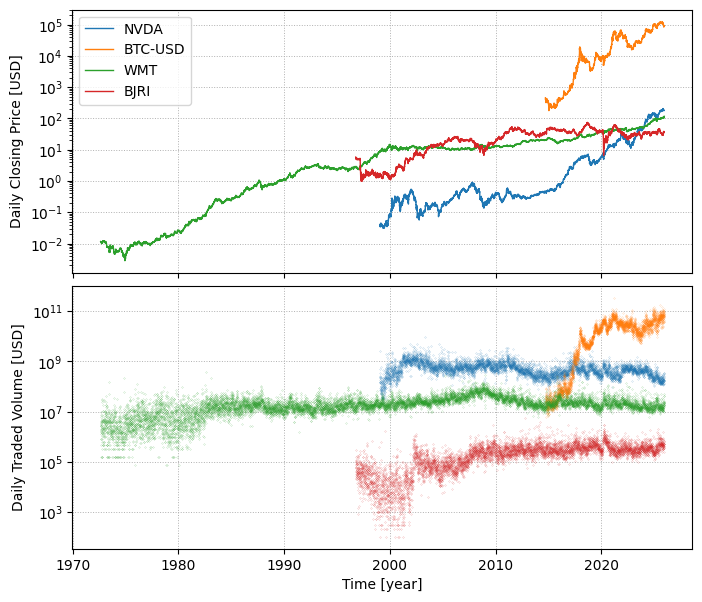

In [2]:
import pandas as pd
from matplotlib import gridspec, pyplot as plt
import os
import numpy as np
from pathlib import Path

# List of currently available files
TICKERS = YAHOO_TICKERS

TICKERS_SAMPLE = ['NVDA', 'BTC-USD', 'WMT', 'BJRI']

DATA_FOLDER = 'data'
USD_HUF = 328

data = dict()  # Data for a ticker
for ticker in TICKERS:

    # --- Read csv to dataframe ---
    df = pd.read_csv(str(Path(DATA_FOLDER) / f'{ticker}.csv'))

    # formatting
    df = df.drop(df.index[[0, 1]])
    df = df.rename(columns={'Price': 'Date'})

    # select columns and set their types 
    df = df[['Date', 'Close', 'Volume']]
    df.Date = pd.to_datetime(df.Date)
    df.Close = pd.to_numeric(df.Close, errors='coerce')
    df.Volume = pd.to_numeric(df.Volume, errors='coerce')

    # Convert HUF to USD
    if ticker.endswith('.BD'):
        df.Close /= USD_HUF
        df.Volume /= USD_HUF

    df.index = df.Date
    data[ticker] = df.dropna()

# --- Create a figure. Define a 2 rows x 1 column grid ---
fig_price_volume = plt.figure(figsize=(8, 7))
gs = gridspec.GridSpec(2, 1, figure=fig_price_volume)

# --- Daily Closing Price ---
ax_price = fig_price_volume.add_subplot(gs[0, 0])
for ticker in TICKERS_SAMPLE:
    ax_price.plot(data[ticker].Date, data[ticker].Close, '-', lw=1, label=ticker, zorder=2)
ax_price.set_yscale('log')
ax_price.set(xlabel='Time [year]', ylabel='Daily Closing Price [USD]')
ax_price.grid(linestyle=':', linewidth=0.7, zorder=1)
ax_price.label_outer()
ax_price.legend(loc='upper left')

# --- Daily Traded Volume ---
ax_volume = fig_price_volume.add_subplot(gs[1, 0])
for ticker in TICKERS_SAMPLE:
    ax_volume.plot(data[ticker].Date, data[ticker].Volume, '.', markersize=0.2, label=ticker, zorder=2)
ax_volume.set_yscale('log')
ax_volume.set(xlabel='Time [year]', ylabel='Daily Traded Volume [USD]')
ax_volume.grid(linestyle=':', linewidth=0.7, zorder=1)

# --- Finalize the plot ---      
plt.subplots_adjust(hspace=0.05) # Set spacing between subplots
plt.show()  # Display the plot directly

# Daily and Monthly log returns

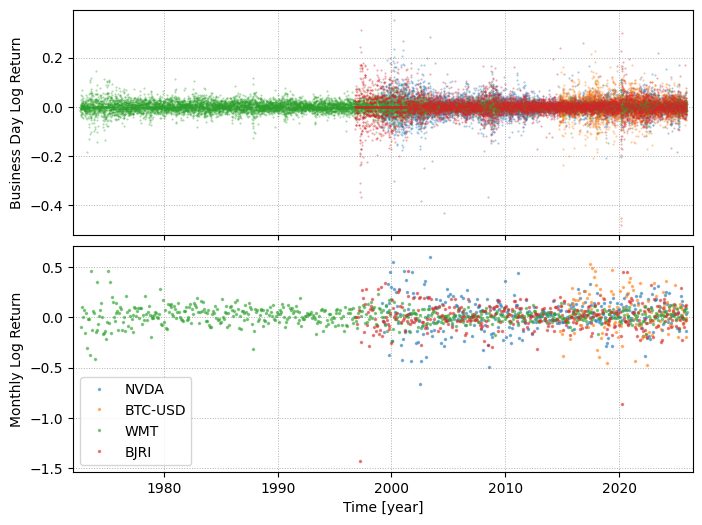

In [3]:
import datetime


def get_last_date_in_each_month(series_of_dates):
    """
    From a series_of_dates get the list_of_last_dates_in_each_month
    """
    list_of_last_dates_in_each_month = []
    groupby_years = series_of_dates.groupby(pd.to_datetime(series_of_dates).dt.year)
    for year, series_of_dates_for_year in groupby_years:
        groupby_months_of_year = series_of_dates_for_year.groupby(series_of_dates_for_year.dt.month)
        for month, group_of_month in groupby_months_of_year:
            list_of_last_dates_in_each_month.append(max(group_of_month))

    return list_of_last_dates_in_each_month


def set_daily_and_monthly_log_returns(_data):
    """
    Input:
        yfinance dataframes by ticker

    Output:
        in each df writing daily_log_return and monthly_log_return
    """
    daily_log_returns = dict()
    monthly_log_returns = dict()

    for ticker, df in _data.items():

        daily_log_returns[ticker] = np.log(df.Close) - np.log(df.Close.shift())
        daily_log_returns[ticker].index = df.Date
        df['daily_log_return'] = daily_log_returns[ticker].dropna()

        last_date_of_each_month = get_last_date_in_each_month(df.Date)
        df_values_on_month_last_dates = df.loc[last_date_of_each_month]
        monthly_log_returns[ticker] = (np.log(df_values_on_month_last_dates.Close)
                                       - np.log(df_values_on_month_last_dates.Close.shift()))
        monthly_log_returns[ticker].index = df_values_on_month_last_dates.Date
        df['monthly_log_return'] = monthly_log_returns[ticker].dropna()


def plot_log_returns(_data, tickers_selected):

    # --- Create a figure. Define a 2 rows x 1 column grid ---
    fig_daily_monthly = plt.figure(figsize=(8, 6))
    gs = gridspec.GridSpec(2, 1, figure=fig_daily_monthly)

    # --- plot daily log returns ---
    ax_daily = fig_daily_monthly.add_subplot(gs[0, 0])
    for ticker in tickers_selected:
        ax_daily.plot(data[ticker]['daily_log_return'], marker='.', ms=1, alpha=0.4, label=ticker, lw=0, zorder=2)
    ax_daily.set_yscale('linear')
    ax_daily.set(xlabel='Time [year]', ylabel='Business Day Log Return')
    ax_daily.set_xlim([datetime.date(1972, 1, 1), datetime.date(2026, 6, 30)])
    ax_daily.label_outer()
    ax_daily.grid(linestyle=':', linewidth=0.7, zorder=1)
    
    # --- plot monthly log returns ---
    ax_monthly = fig_daily_monthly.add_subplot(gs[1, 0])
    for ticker in tickers_selected:
        ax_monthly.plot(data[ticker]['monthly_log_return'], marker='.', ms=3, alpha=0.5, label=ticker, lw=0, zorder=2)
    ax_monthly.set_yscale('linear')
    ax_monthly.set(xlabel='Time [year]', ylabel='Monthly Log Return')
    ax_monthly.set_xlim([datetime.date(1972, 1, 1), datetime.date(2026, 6, 30)])
    ax_monthly.grid(linestyle=':', linewidth=0.7, zorder=1)
    ax_monthly.legend(loc='lower left')

    # --- finalize the plot ---         
    plt.subplots_adjust(hspace=0.05)
    plt.show()

# --- main ---
set_daily_and_monthly_log_returns(data)
plot_log_returns(data, tickers_selected=TICKERS_SAMPLE)

# QQ plot: Log return CDF vs Normal fit CDF

$(1)\,\,$ On which time scale (daily or monthly) is BTC-USD's log return CDF closer to the CDF of the normal fit ?

$(2)\,\,$ Can you find any data errors, for example, cutoff around zero ?

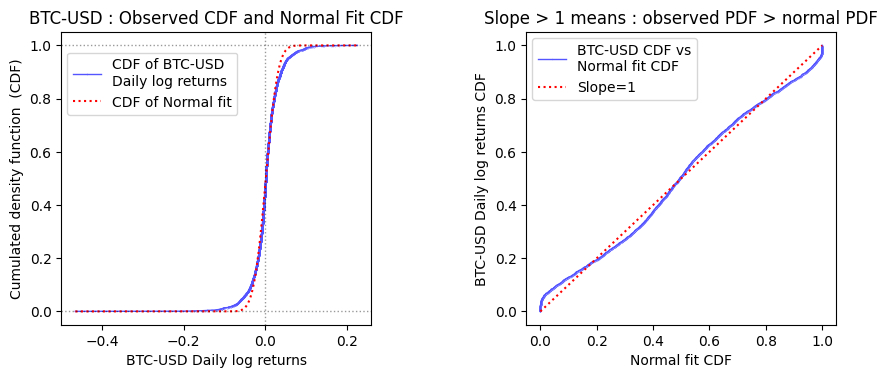

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import erf
import pandas as pd


def get_series_cdf(series):
    """
    Calculate CDF (cumulated density function) of a series
    """
    cdf_x_values = np.sort(series.dropna())
    cdf_y_values = np.arange(1, cdf_x_values.size + 1) / cdf_x_values.size

    return cdf_x_values, cdf_y_values


def get_normal_cdf_value(x, mu, sigma): 
    """
    CDF function value of normal distribution with parameters mu, sigma
    """
    return 0.5 * (1.0 + erf((x - mu) / (sigma * np.sqrt(2.0)))) 



def get_cdf_points_for_data_and_normal_fit(series):
    cdfx, cdfy = get_series_cdf(series)  # CDF of series
    popt, pcov = curve_fit(get_normal_cdf_value, cdfx, cdfy)  # fit normal CDF to series
    cdfy_fit = get_normal_cdf_value(cdfx, *popt)  # CDF of the fitted curve
    
    return cdfx, cdfy, cdfy_fit


def plot_cdf_qq(_data={}, period='daily', selected_ticker='BTC-USD'):

    # --- Create a figure. Define a 1 row x 2 columns grid ---
    fig_cdf_qq, [ax_cdf, ax_qq] = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.8))

    # --- CDF of series, and CDF of normal fit ---
    cdfx, cdfy, cdfy_fit = get_cdf_points_for_data_and_normal_fit(_data[selected_ticker][f'{period}_log_return'])

    # --- daily or monthly log return CDF compared to normal fit's CDF ---
    ax_cdf.set_xlabel(f'{selected_ticker} {period.capitalize()} log returns')
    ax_cdf.set_ylabel('Cumulated density function  (CDF)')
    ax_cdf.set_title(f'{selected_ticker} : Observed CDF and Normal Fit CDF')
    ax_cdf.plot(cdfx, cdfy, c='#55f', marker='o', label=f'CDF of {selected_ticker}\n'
                f'{period.capitalize()} log returns', ms=0.1, lw=1, zorder=1)
    ax_cdf.plot(cdfx, cdfy_fit, c='r', ls=':', label='CDF of Normal fit', lw=1.5, zorder=2)
    ax_cdf.legend(bbox_to_anchor=(.02, .93), loc=2, borderaxespad=0.)
    ax_cdf.axhline(0, c='k', ls=':', lw=1, alpha=0.4, zorder=3)
    ax_cdf.axhline(1, c='k', ls=':', lw=1, alpha=0.4, zorder=3)
    ax_cdf.axvline(0, c='k', ls=':', lw=1, alpha=0.4, zorder=3)

    # --- qq plot ---
    ax_qq.plot(cdfy_fit, cdfy, c='#55f', marker='.', ms=0.1, lw=1, label=f'{selected_ticker} CDF vs\nNormal fit CDF')
    ax_qq.plot([0,1], [0,1], 'r:', lw=1.5, label='Slope=1')  # slope=1 for comparison
    ax_qq.set_xlabel('Normal fit CDF')
    ax_qq.set_ylabel(f'{selected_ticker} {period.capitalize()} log returns CDF', zorder=1)
    ax_qq.set_title('Slope > 1 means : observed PDF > normal PDF', zorder=1)
    ax_qq.legend(bbox_to_anchor=(0.02, .98), loc=2, borderaxespad=0.)
    
    # --- finalize the plot ---         
    plt.subplots_adjust(wspace=0.5)
    plt.show()

# --- main ---
plot_cdf_qq(_data=data, period='daily', selected_ticker='BTC-USD')

# Autocorr of log return and abs log return

These plots show autocorrelation vs time difference. 

1. Which daily log return has significantly nonzero autocorrelation ?
2. Which abs daily log return has the highest and lowest autocorrelation after long time ?


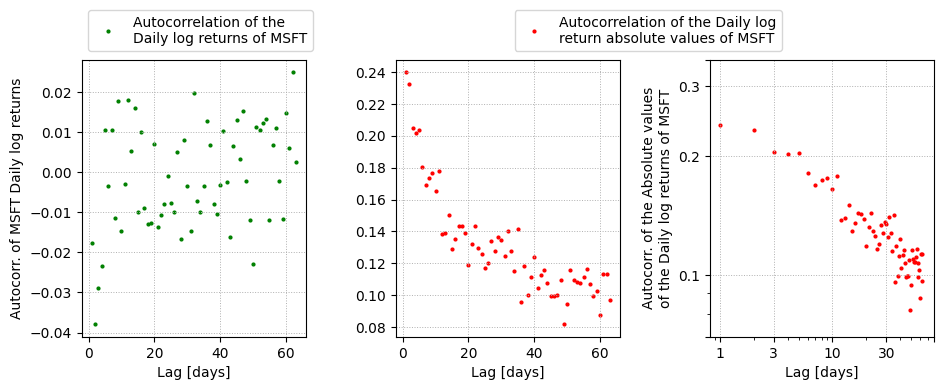

In [5]:
from matplotlib import ticker


def get_autocorr_of_series_and_of_series_abs(series, max_lag):
    """
    return: autocorrelation of the series, autocorrelation of the absolute values in the series
    """
    lags = pd.Series(np.arange(1, max_lag + 1))

    return lags, lags.apply(lambda x: series.autocorr(lag=x)), lags.apply(lambda x: series.abs().autocorr(lag=x))


def plot_autocorr_logreturns(_data={}, period='monthly', max_lag=24, selected_ticker='BTC-USD'):
    """
    Plot autocorrelation of log returns, and autocorrelation of the absolute value of the log returns.
    """
    # --- Create a figure. Define a 1 row x 3 columns grid ---
    fig_autocorr, [ax, ax_abs, ax_abs_trf] = plt.subplots(nrows=1, ncols=3, figsize=(11, 3.6))

    # --- lags applied, autocorr of log return, autocorr of abs. log return ---
    lags, autocorr, autocorr_of_abs = get_autocorr_of_series_and_of_series_abs(
        series=_data[selected_ticker][f'{period}_log_return'], max_lag=max_lag)

    # --- autocorrelation of the series ---
    ax.set_xlabel(f'Lag [{"days" if period == "daily" else "months"}]')
    ax.set_ylabel(f'Autocorr. of {selected_ticker} {period.capitalize()} log returns')
    ax.plot(lags, autocorr, c='g', marker='o', ms=2, lw=0, zorder=1,
            label=f'Autocorrelation of the\n{period.capitalize()} log returns of {selected_ticker}')
    ax.legend(bbox_to_anchor=(0.03, 1.03), loc=3, borderaxespad=0.)
    ax.grid(linestyle=':', linewidth=0.7, zorder=1)

    # --- autocorrelation of the absolute values ---
    ax_abs.set_xlabel(f'Lag [{"days" if period == "daily" else "months"}]')
    ax_abs.plot(lags, autocorr_of_abs, c='r', marker='o', ms=2, lw=0, zorder=1,
                label=f'Autocorrelation of the {period.capitalize()} log\nreturn absolute values of {selected_ticker}')
    ax_abs.legend(bbox_to_anchor=(0.53, 1.03), loc=3, borderaxespad=0.)
    ax_abs.grid(linestyle=':', linewidth=0.7, zorder=1)
    
    # --- autocorrelation of abs value with transformed axes --- 
    ax_abs_trf.set_xscale('log')
    ax_abs_trf.set_yscale('log')
    ax_abs_trf.set_xlabel(f'Lag [{"days" if period == "daily" else "months"}]')
    ax_abs_trf.set_ylabel(f'Autocorr. of the Absolute values\n'
                          f'of the {period.capitalize()} log returns of {selected_ticker}')
    ax_abs_trf.plot(lags, autocorr_of_abs, c='r', marker='o', ms=2, lw=0, zorder=1,
                    label=f'Autocorrelation of the {period.capitalize()} log\nreturn absolute values of {selected_ticker}')
    ax_abs_trf.set_xticks([1, 3, 10, 30, 80])
    ax_abs_trf.set_xticklabels(['1', '3', '10', '30', ''])
    ax_abs_trf.set_yticks([0.07, 0.1, 0.2, 0.3, 0.35])
    ax_abs_trf.set_yticklabels(['', '0.1', '0.2', '0.3', ''])    
    ax_abs_trf.grid(linestyle=':', linewidth=0.7, zorder=1)
 
    # --- finalize the plot ---         
    plt.subplots_adjust(wspace=0.4)
    plt.show()


# --- main --- set variables: period, max_lag, selected_ticker ---
plot_autocorr_logreturns(_data=data, period='daily', max_lag=63, selected_ticker='MSFT')

# Volume vs log Return

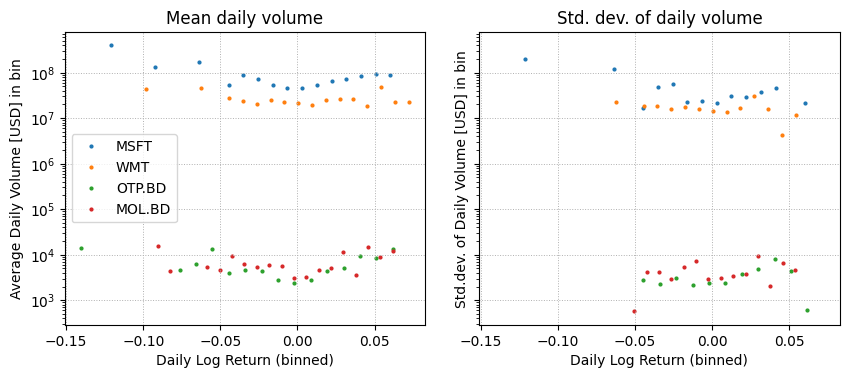

In [6]:
from scipy.stats import binned_statistic


def plot_volume_vs_log_return(_data, selected_tickers):

    # --- Create a figure. Define a 1 row x 2 columns grid (daily, monthly) ---
    fig_volume_logreturn, [ax_mean, ax_std] = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 3.8))

    # --- Left subplot: mean daily volume in bins of daily log return ---
    for ticker in selected_tickers:
        dat = _data[ticker].dropna()

        bin_means, bin_edges, _ = binned_statistic(dat.daily_log_return, dat.Volume, statistic='mean', bins=20)
        bin_width = (bin_edges[1] - bin_edges[0])
        bin_centers = bin_edges[1:] - bin_width/2

        ax_mean.plot(bin_centers, bin_means, marker='o', ms=2, lw=0, label=ticker, zorder=1)

    ax_mean.set_yscale('log')
    ax_mean.grid(linestyle=':', linewidth=0.7, zorder=1)
    ax_mean.set(xlabel='Daily Log Return (binned)', ylabel='Average Daily Volume [USD] in bin')
    ax_mean.legend(loc='center left')
    ax_mean.set_title('Mean daily volume')

    # --- Right subplot: std.dev. of daily volume in bins of daily log return ---
    for ticker in selected_tickers:
        dat = _data[ticker].dropna()

        bin_std_devs, bin_edges, _ = binned_statistic(dat.daily_log_return, dat.Volume, statistic='std', bins=20)
        bin_width = (bin_edges[1] - bin_edges[0])
        bin_centers = bin_edges[1:] - bin_width/2

        ax_std.plot(bin_centers, bin_std_devs, marker='o', ms=2, lw=0, label=ticker, zorder=1)
    
    ax_std.set_yscale('log')
    ax_std.grid(linestyle=':', linewidth=0.7, zorder=1)
    ax_std.set(xlabel='Daily Log Return (binned)', ylabel='Std.dev. of Daily Volume [USD] in bin')
    ax_std.set_title('Std. dev. of daily volume')
    
    # --- finalize the plot ---         
    plt.subplots_adjust(wspace=0.15)
    plt.show()


plot_volume_vs_log_return(_data=data, selected_tickers=['MSFT', 'WMT', 'OTP.BD', 'MOL.BD'])

# Monthly Volume vs Volatility

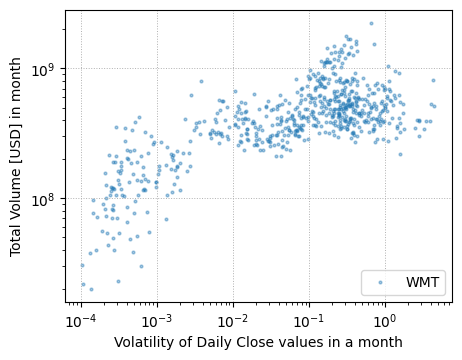

In [7]:
def get_vols_and_volumes(_df):
    """
    input: The received dataframe has a datetime index.
    return: For each month end, return the monthly volatility of the daily close values, and the monthly volume.
    """
    results = []
    _df_groupby_month = _df.groupby(_df.index.to_period('M'))
    for month_end, df_by_month in _df_groupby_month:
        results.append({'month_end': month_end,
                        'std_dev_close': df_by_month.Close.std(),
                        'volume': df_by_month.Volume.sum()})

    return ([r['month_end'] for r in results],
            [r['std_dev_close'] for r in results],
            [r['volume'] for r in results])


def plot_volume_vs_volatility(_data, selected_ticker):

    # --- Create a figure. Define a 1 row x 1 column grid ---
    fig_volume_volatility, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3.8))

    # --- For each month calculate the volatility of daily close values in that month ---
    monthly_ends, daily_close_vols_in_month, volume_in_month = get_vols_and_volumes(_df=_data[selected_ticker])
    ax.plot(daily_close_vols_in_month, volume_in_month, marker='o', ms=2, lw=0,
            label=selected_ticker, alpha=0.4, zorder=1)
    ax.legend(loc='lower right')

    # --- settings and finalization ---         
    ax.set(xlabel='Volatility of Daily Close values in a month', ylabel='Total Volume [USD] in month')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(linestyle=':', linewidth=0.7, zorder=2)
    plt.show()


plot_volume_vs_volatility(_data=data, selected_ticker='WMT')

# Skewness of the daily log returns PDF 

1. What does the sum of the highest and the lowest value tell about a distribution ?
2. Does the negative skew of SP500 mean that stock prices respond faster to negative news than to positive news ?


| Name | Symbol and Calculation |
|:-----|:------------|
| Random variable | $X$ |
| Mean | $\mu = E\left[ \,X \,\right]$ |
| Variance | ${\displaystyle \sigma^{\,2} = E\left[ \, \left( \, X - \mu \, \right)^{\,2} \, \right] }$ |
| Volatility = Std.dev. | $\sigma$ |
| Skewness | ${\displaystyle E\left[\,\left(\frac{X-\mu}{\sigma}\,\right)^{\,3} \, \right]}$|

,Skewness,Min+Max
AMZN,0.451723,0.011613
BJRI,-0.510757,-0.167371
BTC-USD,-0.712795,-0.239611
ETH-USD,-0.786088,-0.315991
EUR=X,-0.546932,-0.016308
GC=F,-0.307874,-0.011774
JPYUSD=X,0.628925,0.005585
MOL.BD,0.044121,-0.021955
MSFT,-0.557106,-0.179640
MTELEKOM.BD,0.071807,-0.005525


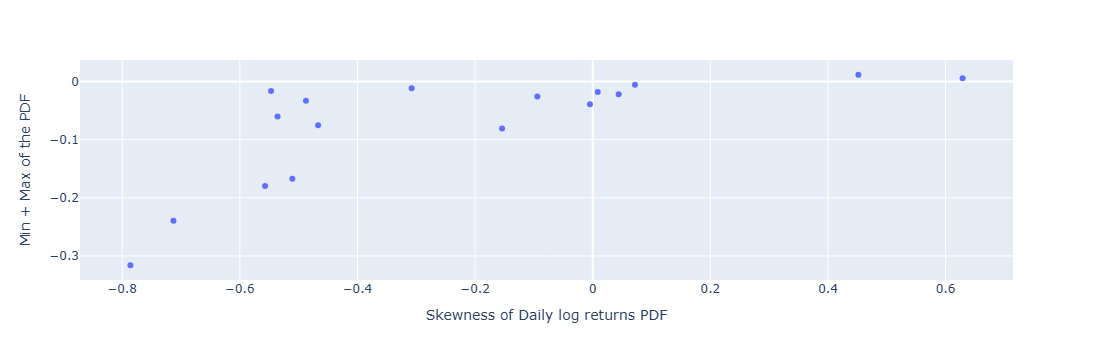

In [8]:
import plotly.express as px


def analyse_skewnesses(_data, tickers, period='daily'):
    """Skewness, First value + Last value"""

    # --- Set up and display skewness analysis data ---     
    log_ret_skewness = []
    log_ret_min_plus_max = []
    for ticker in tickers:
        df = _data[ticker]
        log_ret_skewness.append(df[f'{period}_log_return'].skew())
        log_ret_min_plus_max.append(df[f'{period}_log_return'].min() + df[f'{period}_log_return'].max())
        
    skewness_df = pd.DataFrame({'Skewness': log_ret_skewness, 'Min+Max': log_ret_min_plus_max})
    skewness_df.index = tickers
    display(skewness_df)
    
    # --- Create plot ---
    plot_df = pd.DataFrame({'x': log_ret_skewness, 'y': log_ret_min_plus_max, 'label': tickers})
    fig = px.scatter(plot_df, x='x', y='y', hover_name='label', hover_data={'x': False, 'y': False},
                     labels={'x': f'Skewness of {period.capitalize()} log returns PDF',
                             'y': f'Min + Max of the PDF'})
    fig.show()

    
analyse_skewnesses(_data=data, tickers=sorted(YAHOO_TICKERS))

# Yearly mean vs volatility of daily log returns

For each year separately, calculate (1) the mean of the daily log return of a ticker, and (2) the volatility.

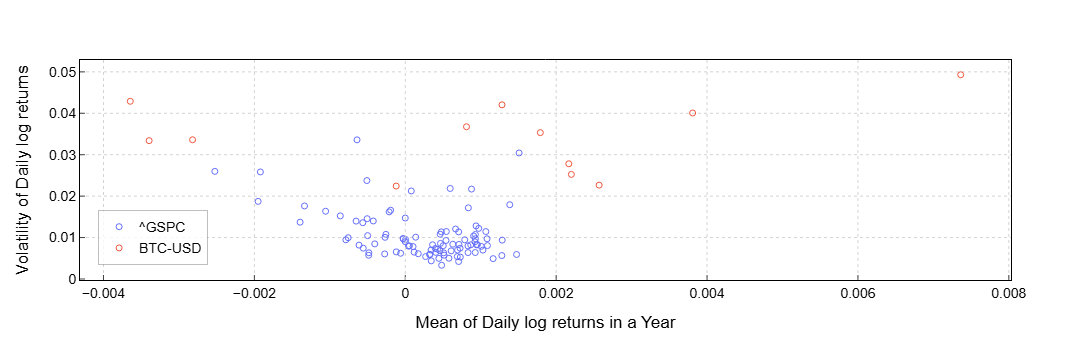

In [81]:
import plotly.express as px


def get_yearly_vols_and_means(_df):
    """
    input: The received dataframe has a datetime index.
    return: For each year end, return the yearly mean and yearly volatility of the daily log return values.
    """
    results = []
    _df_groupby_year = _df.groupby(_df.index.to_period('Y'))
    for year_end, df_by_year in _df_groupby_year:
        results.append({'year_end': year_end,
                        'mean_daily_log_return': df_by_year.daily_log_return.mean(),
                        'vol_daily_log_return': df_by_year.daily_log_return.std()})
    
    return ([r['year_end'].year for r in results],
            [r['mean_daily_log_return'] for r in results],
            [r['vol_daily_log_return'] for r in results])


def yearly_mean_and_vol_of_daily_log_return(_data, selected_tickers):

    fig = px.scatter()
    for ticker, color in zip(selected_tickers, px.colors.qualitative.Plotly):

        # --- For each year calculate the mean and the volatility of daily return values in that year ---
        years, means, vols = get_yearly_vols_and_means(_df=_data[ticker])
    
        # --- Create the plot ---
        plot_df = pd.DataFrame({'x': means, 'y': vols, 'label': years})
        fig_ticker = px.scatter(plot_df, x='x', y='y', hover_name='label', hover_data={'x': False, 'y': False}, symbol_sequence=['circle-open'])
        fig_ticker.data[0].name = ticker
        fig_ticker.data[0].showlegend = True
        fig_ticker.data[0].marker.color = color

        # --- Adding this to the main plot ---
        fig.add_traces(fig_ticker.data)

    # --- Formatting ---
    fig.update_layout(
        plot_bgcolor="white",
        paper_bgcolor="white",
        font=dict(family="Arial", size=14, color="black"),
        # Legend in the bottom left
        legend=dict(
            xanchor="left", x=0.02,
            yanchor="bottom", y=0.07,
            bgcolor="rgba(255, 255, 255, 0.8)", # Slightly opaque so grid doesn't distract
            bordercolor="Gray", borderwidth=0.5
        )
    )
    axis_config = dict(
        showline=True, 
        linewidth=1., 
        linecolor='black', 
        mirror=True,
        ticks="inside",

        # Grid Styling
        showgrid=True,
        gridcolor='LightGrey',
        griddash='dot',

        # # Zero Line Styling (Ensures the line at x=0 or y=0 shows up)
        # zeroline=True,
        # zerolinecolor='LightGrey',
        # zerolinewidth=1
    )
    fig.add_vline(x=0, line_width=1, line_dash="dot", line_color="LightGrey")  # need this to ensure that the zeroline is dashed
    fig.update_xaxes(title_text="Mean of Daily log returns in a Year", **axis_config)
    fig.update_yaxes(title_text="Volatility of Daily log returns", **axis_config)
    
    # --- Finalize the figure ---
    fig.show()


yearly_mean_and_vol_of_daily_log_return(_data=data, selected_tickers=['^GSPC', 'BTC-USD'])